In [1]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("D:\\Python_data_project\\1_basics\\data_jobs.csv")
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US=df[df['job_country']=='United States'].copy()

In [4]:
df_US=df_US.dropna(subset='salary_year_avg')

In [9]:
job_titles=df_US['job_title_short'].value_counts().index[:6].tolist()

In [10]:
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [11]:
df_US_top6=df_US[df_US['job_title_short'].isin(job_titles)]

In [23]:
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

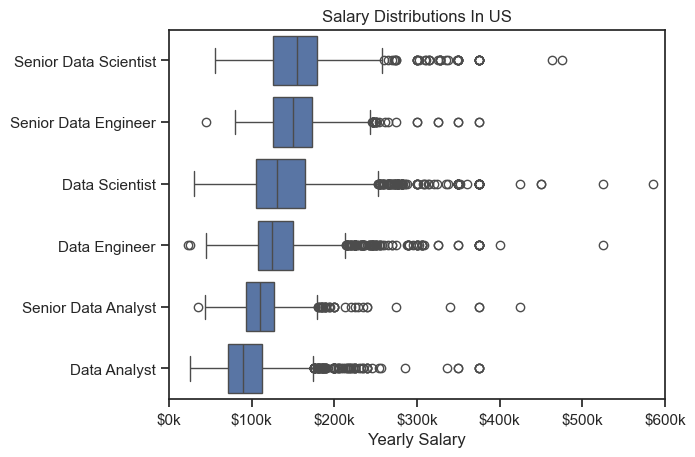

In [24]:
sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.ylabel('')
plt.xlabel('Yearly Salary')
plt.title('Salary Distributions In US')
plt.xlim(0,600000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}k'))

In [28]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].dropna(subset='salary_year_avg').copy()

In [29]:
df_DA_US=df_DA_US.explode('job_skills')

In [36]:
df_DA_top_pay=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

In [56]:
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [51]:
df_DA_skills=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10)

In [52]:
df_DA_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


In [54]:
df_DA_skills=df_DA_skills.sort_values(by='median',ascending=False)

C:\Users\LENOVO L480\AppData\Local\Temp\ipykernel_25092\2911607229.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


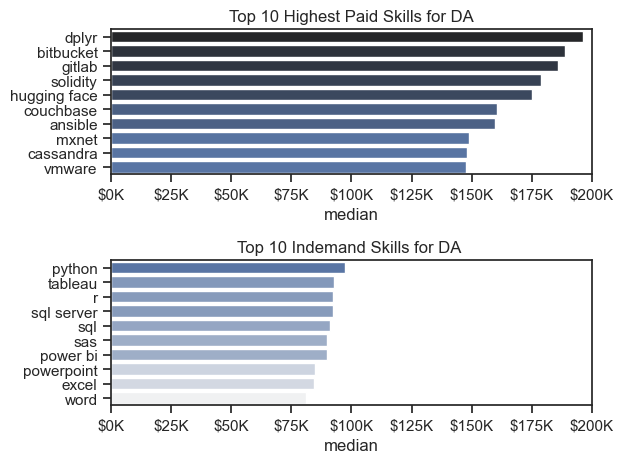

In [55]:
fig, ax=plt.subplots(2,1)
#df_DA_US_highpay.plot(kind='barh',y='median',ax=ax[0],legend=False)
sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r',legend=False)
#ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for DA')
ax[0].set_ylabel('')
ax[0].set_xlim(0,200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.legend().set_visible(False)
#df_DA_US_indemand.plot(kind='barh',y='median',ax=ax[1])
sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b')
#ax[1].invert_yaxis()
ax[1].set_xlim(0,200000)
ax[1].set_ylabel('')
ax[1].set_title('Top 10 Indemand Skills for DA ')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.tight_layout()
plt.legend().set_visible(False)